In [31]:
# Build a machine learning model to predict user will click the ad or not 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import importlib.util
import pickle
import seaborn as sns

In [32]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
#At home windows
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "C:/Users/PRAYAS/PycharmProjects/Machine_Learning_Python/Utility/DataPreprocessing.py")
# C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Utility
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()


Data PreProcessign object created successfully


In [33]:
dataframe = pd.read_csv('Data/Social_Network_Ads.csv')

In [34]:
dataframe.sample()

,,,,<<<<<<< HEAD
15571059,Female,33,41000,0


In [35]:
(dataframe==np.NaN).sum()

<<<<<<< HEAD    0
dtype: int64

In [36]:
dataframe.sample()

,,,,<<<<<<< HEAD
15745232,Male,26,32000,0


ValueError: zero-size array to reduction operation minimum which has no identity

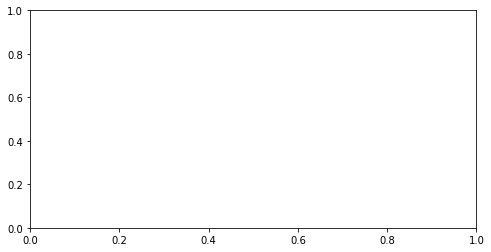

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(dataframe.corr())
# df.corr() Gives correlation matrix
# here it shows the correlation by color mentioned on right side

In [ ]:
dataframe= dataframe.drop('User ID',axis=1)

In [ ]:
sns.pairplot(dataframe,hue='Gender',palette='bright')

In [ ]:
sns.violinplot(x='Gender',y='EstimatedSalary',data=dataframe)
# shows us the distribution of data here we're checkign the salary of each gender

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Purchased',data=dataframe,hue='Gender')
# Here we'll see the count of  males who have purchased and who have not

In [ ]:
sns.countplot(ax=ax,x='Age',data=dataframe,hue='Purchased')
# it shows that at what age averagely 

In [ ]:
(dataframe==np.NaN).sum()

In [ ]:
(dataframe.Age==0).sum()

In [ ]:
ss = StandardScaler()

In [ ]:
Y_train = dataframe['Purchased']
dataframe = dataframe.drop('Purchased',axis=1)

In [ ]:
dataframe.head()

In [ ]:
le=LabelEncoder()
dataframe['Gender'] = (pd.DataFrame(dataframe['Gender'])).apply(le.fit_transform)

In [ ]:
for item in range(1,dataframe.shape[1]):
    dataframe.iloc[:,item] = ss.fit_transform((dataframe.iloc[:,item].values).reshape(-1,1))

In [ ]:
dataframe.head()

In [ ]:
class Logistic_Regression_sklearn():
        
    def Logistic_Regression_sklearn_demo(self,X_train,Y_train,X_test,Y_test):
        classifier = LogisticRegression(random_state=2)
        classifier.fit(X_train,Y_train)
        # storing in the file
        file = open('Logisticregression.pkl','wb')
        pickle.dump(classifier,file)
        file.close()
        Ypred = classifier.predict(X_test)
        cmat = confusion_matrix(Y_test,Ypred)
        print("Accuracy by accuracy score is = {}\nThe confusion matrix is: \n{}".format(accuracy_score(Ypred,Y_test)*100,cmat))
        return classifier
    
    def plotter(self,X_train,Y_train,classifier,title):
        X1_grid, X2_grid = np.meshgrid(np.arange(start=X_train.iloc[:,0].min()-1,stop=X_train.iloc[:,0].max()+1,step=0.01),
                                       np.arange(start=X_train.iloc[:,1].min()-1,stop=X_train.iloc[:,1].max()+1,step=0.01))
                                      
        plt.figure(figsize=(10,6))
        plt.contourf(X1_grid,X2_grid,classifier.predict(np.array([X1_grid.ravel(),X2_grid.ravel()]).T).reshape(X1_grid.shape)
                     ,alpha=0.75, cmap = ListedColormap(('#ff2a16','#35ff16'))
                    )
        plt.title(title)
        plt.xlim(X1_grid.min(),X1_grid.max())
        plt.ylim(X2_grid.min(),X2_grid.max())
        for i,j in enumerate(np.unique(Y_train)):
            plt.scatter(X_train.values[Y_train[:]==j,0],X_train.values[Y_train[:]==j,1],
                        c = ListedColormap(('red','green'))(i),label=j)
    
    def main(self,dataframe,Y_train):
        X_train = dataframe[['Age','EstimatedSalary']]
        X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size = 0.3)
        classifier = self.Logistic_Regression_sklearn_demo(X_train,Y_train,X_test,Y_test)
        self.plotter(X_train,Y_train,classifier,"train data vs separator")
        self.plotter(X_test,Y_test,classifier,"Test data vs separator")

In [ ]:
classifier = Logistic_Regression_sklearn()
classifier.main(dataframe,Y_train)